In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.utils import compute_sample_weight
from sklearn.metrics import balanced_accuracy_score
from plot_learning_curve import plot_learning_curve, plot_validation_curve
import matplotlib.pyplot as plt
from sklearn import preprocessing

None


In [2]:
credit_train = pd.read_csv("credit-a.tsv", sep = "\t")
credit_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,2,156,0.000,2,1,13,8,1.25,1,1,1.0,0,0,42,0.0,0
1,1,328,4.460,2,1,11,4,3.04,1,1,6.0,0,0,118,560.0,0
2,1,89,0.500,2,1,11,4,1.50,1,0,0.0,0,0,74,824.0,0
3,2,125,1.540,2,1,13,8,3.75,1,1,5.0,1,0,1,3.0,0
4,2,43,5.625,2,1,13,8,1.71,1,0,0.0,0,2,8,0.0,0


In [3]:
credit_train = pd.get_dummies(credit_train, columns=['A1', 'A4', 'A5', 'A7', 'A9', 'A10', 'A12', 'A13'])
credit_train.shape

(690, 38)

In [4]:
credit_train['target'].value_counts()/credit_train.shape[0]

1    0.555072
0    0.444928
Name: target, dtype: float64

In [5]:
normalize_columns = ['A2', 'A3', 'A6','A8', 'A11', 'A14']
def normalize(columns):
  scaler = preprocessing.StandardScaler()
  credit_train[columns] = scaler.fit_transform(credit_train[columns])
normalize(normalize_columns)

In [6]:
X = credit_train[[c for c in credit_train.columns if c != 'target']]
y = credit_train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

### Trying NN Classifier without HyperParameter tunings

In [7]:
base_clf = MLPClassifier()

In [8]:
base_clf.fit(X_train, y_train)
y_train_pred = base_clf.predict(X_train)
y_test_pred = base_clf.predict(X_test)
print("Train Accuracy: ", balanced_accuracy_score(y_train, y_train_pred))
print("Test Accuracy: ", balanced_accuracy_score(y_test, y_test_pred))

Train Accuracy:  0.8435178757375911
Test Accuracy:  0.8510869565217392


In [9]:
base_clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

### Generate Learning Curve & Validation Curve with default classifier

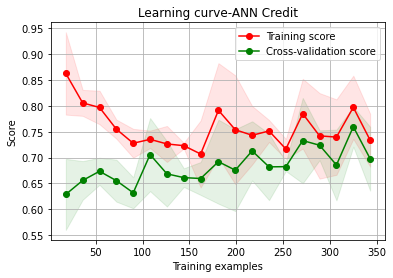

In [10]:
plot_learning_curve(base_clf, "Learning curve-ANN Credit", X_train, y_train, ylim=None, cv=4, n_jobs=-1)

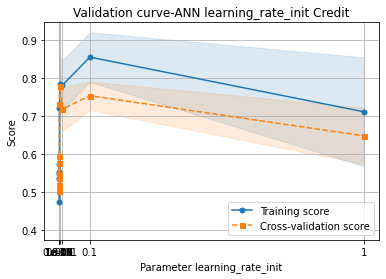

In [11]:
plot_validation_curve(base_clf, X_train, y_train, 'learning_rate_init', [0.0000000001, 0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1], cv=4, n_jobs=-1,scoring=make_scorer(balanced_accuracy_score), title="Validation curve-ANN learning_rate_init Credit")

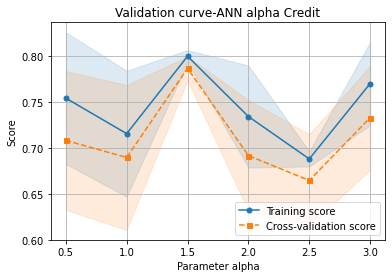

In [12]:
plot_validation_curve(base_clf, X_train, y_train, 'alpha', np.arange(0.5, 3.5, 0.5), cv=4, n_jobs=-1,scoring=make_scorer(balanced_accuracy_score), title="Validation curve-ANN alpha Credit")

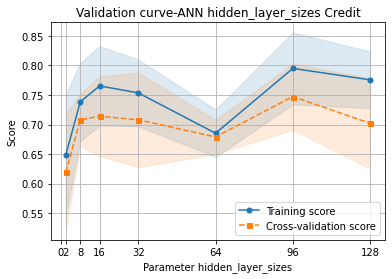

In [17]:
plot_validation_curve(base_clf, X_train, y_train, 'hidden_layer_sizes', [(0), (2), (8), (16), (32), (64), (96), (128)], cv=4, n_jobs=-1,scoring=make_scorer(balanced_accuracy_score), title="Validation curve-ANN hidden_layer_sizes Credit")

### Conducting GridSearch to obtain best HyperParameters 

In [18]:
param_grid = {
        'activation':['sigmoid', 'relu'],
        'alpha': np.arange(0.5, 2.1, 0.2),
        'hidden_layer_sizes': [(0), (2), (8), (16), (32), (64), (96), (128)], #[(32), (64), (64, 64), (128), (128,128)], #, (32, 64, 32), (64, 128, 64)],
        'learning_rate_init': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
      }

In [19]:
grid_search = GridSearchCV(base_clf, param_grid= param_grid, cv=4, scoring=make_scorer(balanced_accuracy_score), verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 896 candidates, totalling 3584 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0279s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0449s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0469s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0753s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0947s.) Setting batch_size=32.
[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed:    0.4s
[Parallel(n

GridSearchCV(cv=4, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['sigmoid', 'relu'],
                         'alpha': array([0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]),
                         'hidden_layer_sizes': [0, 2, 8, 16, 32, 64, 96, 128],
                         'learning_rate_init': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01, 0.1, 1]},
             scoring=make_scorer(balanced_accuracy_score), verbose=10)

In [20]:
grid_search.best_params_

{'activation': 'relu',
 'alpha': 1.6999999999999997,
 'hidden_layer_sizes': 16,
 'learning_rate_init': 0.001}

In [21]:
grid_search.best_estimator_

MLPClassifier(alpha=1.6999999999999997, hidden_layer_sizes=16)

In [22]:
grid_search.best_score_

0.8099374719692939

### Generating Learning Curve with tuned Hyperparameters

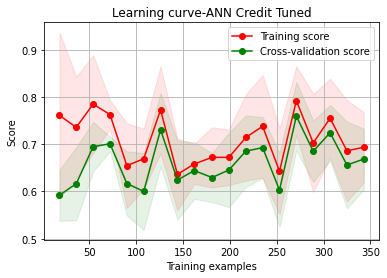

In [23]:
plot_learning_curve(grid_search.best_estimator_, "Learning curve-ANN Credit Tuned", X_train, y_train, ylim=None, cv=4, n_jobs=-1)

### Fitting classifier with best parameters and calculating test score 

In [24]:
# best_params = grid_search.cv_results_['params'][np.argmax(grid_search.cv_results_['mean_test_score'])]
# best_clf = MLPClassifier(**best_params)
# best_clf.get_params()

best_clf = MLPClassifier(alpha=1.6999999999999997, hidden_layer_sizes=16)

In [25]:
best_clf.fit(X_train, y_train)
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)
print("Train Accuracy: ", balanced_accuracy_score(y_train, y_train_pred))
print("Test Accuracy: ", balanced_accuracy_score(y_test, y_test_pred))

Train Accuracy:  0.7247309961818813
Test Accuracy:  0.7456521739130435
